# Requirements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Dataset

In [ ]:
attributes_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df = pd.read_csv('car.data', header = None, names = attributes_names)

6 attributes all of them with ordinal data

classification into 4 classes

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# Data preprocessing

there aren't any missing values

In [ ]:
df.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [ ]:
for i in range(df.shape[1] - 1):

  cat = [df.iloc[:,i].unique().tolist()]

  ordinal_encoder = OrdinalEncoder(categories = cat)

  df.iloc[:, [i]] = ordinal_encoder.fit_transform(df.iloc[:,[i]])

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,0.0,0.0,0.0,0.0,0.0,0.0,unacc
1,0.0,0.0,0.0,0.0,0.0,1.0,unacc
2,0.0,0.0,0.0,0.0,0.0,2.0,unacc
3,0.0,0.0,0.0,0.0,1.0,0.0,unacc
4,0.0,0.0,0.0,0.0,1.0,1.0,unacc
...,...,...,...,...,...,...,...
1723,3.0,3.0,3.0,2.0,1.0,1.0,good
1724,3.0,3.0,3.0,2.0,1.0,2.0,vgood
1725,3.0,3.0,3.0,2.0,2.0,0.0,unacc
1726,3.0,3.0,3.0,2.0,2.0,1.0,good


splitting the dataset

In [ ]:
x = df.drop(columns = 'class')
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                 test_size = 0.3,
                                                 random_state = 42)

# Decision Tree

so max_depth < 6, gi klasificrase podatocite vo samo 2 klasi (nebalansiran dataset, vo najbrojnite, unacc i acc)

In [ ]:
clf_entropy = DecisionTreeClassifier(max_depth = 6, random_state = 42, criterion='entropy')
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [ ]:
clf_gini = DecisionTreeClassifier(max_depth = 6, random_state = 42, criterion='gini')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [156]:
clf_entropy.feature_importances_

array([0.14765635, 0.16205062, 0.00354661, 0.24947832, 0.11348005,
       0.32378806])

In [155]:
clf_gini.feature_importances_

array([0.0930157 , 0.22658369, 0.00080358, 0.29050551, 0.10648284,
       0.28260867])

buying, maint, doors, persons, lug_boot, safety

In [ ]:
text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- class: unacc
|--- feature_5 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: unacc
|   |--- feature_3 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: unacc
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |--- feature_5 >  1.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature

odlucuvackite drva se slicni, kako najvazni atributi za podelba gi zema i kaj dvete safety, persons, buying

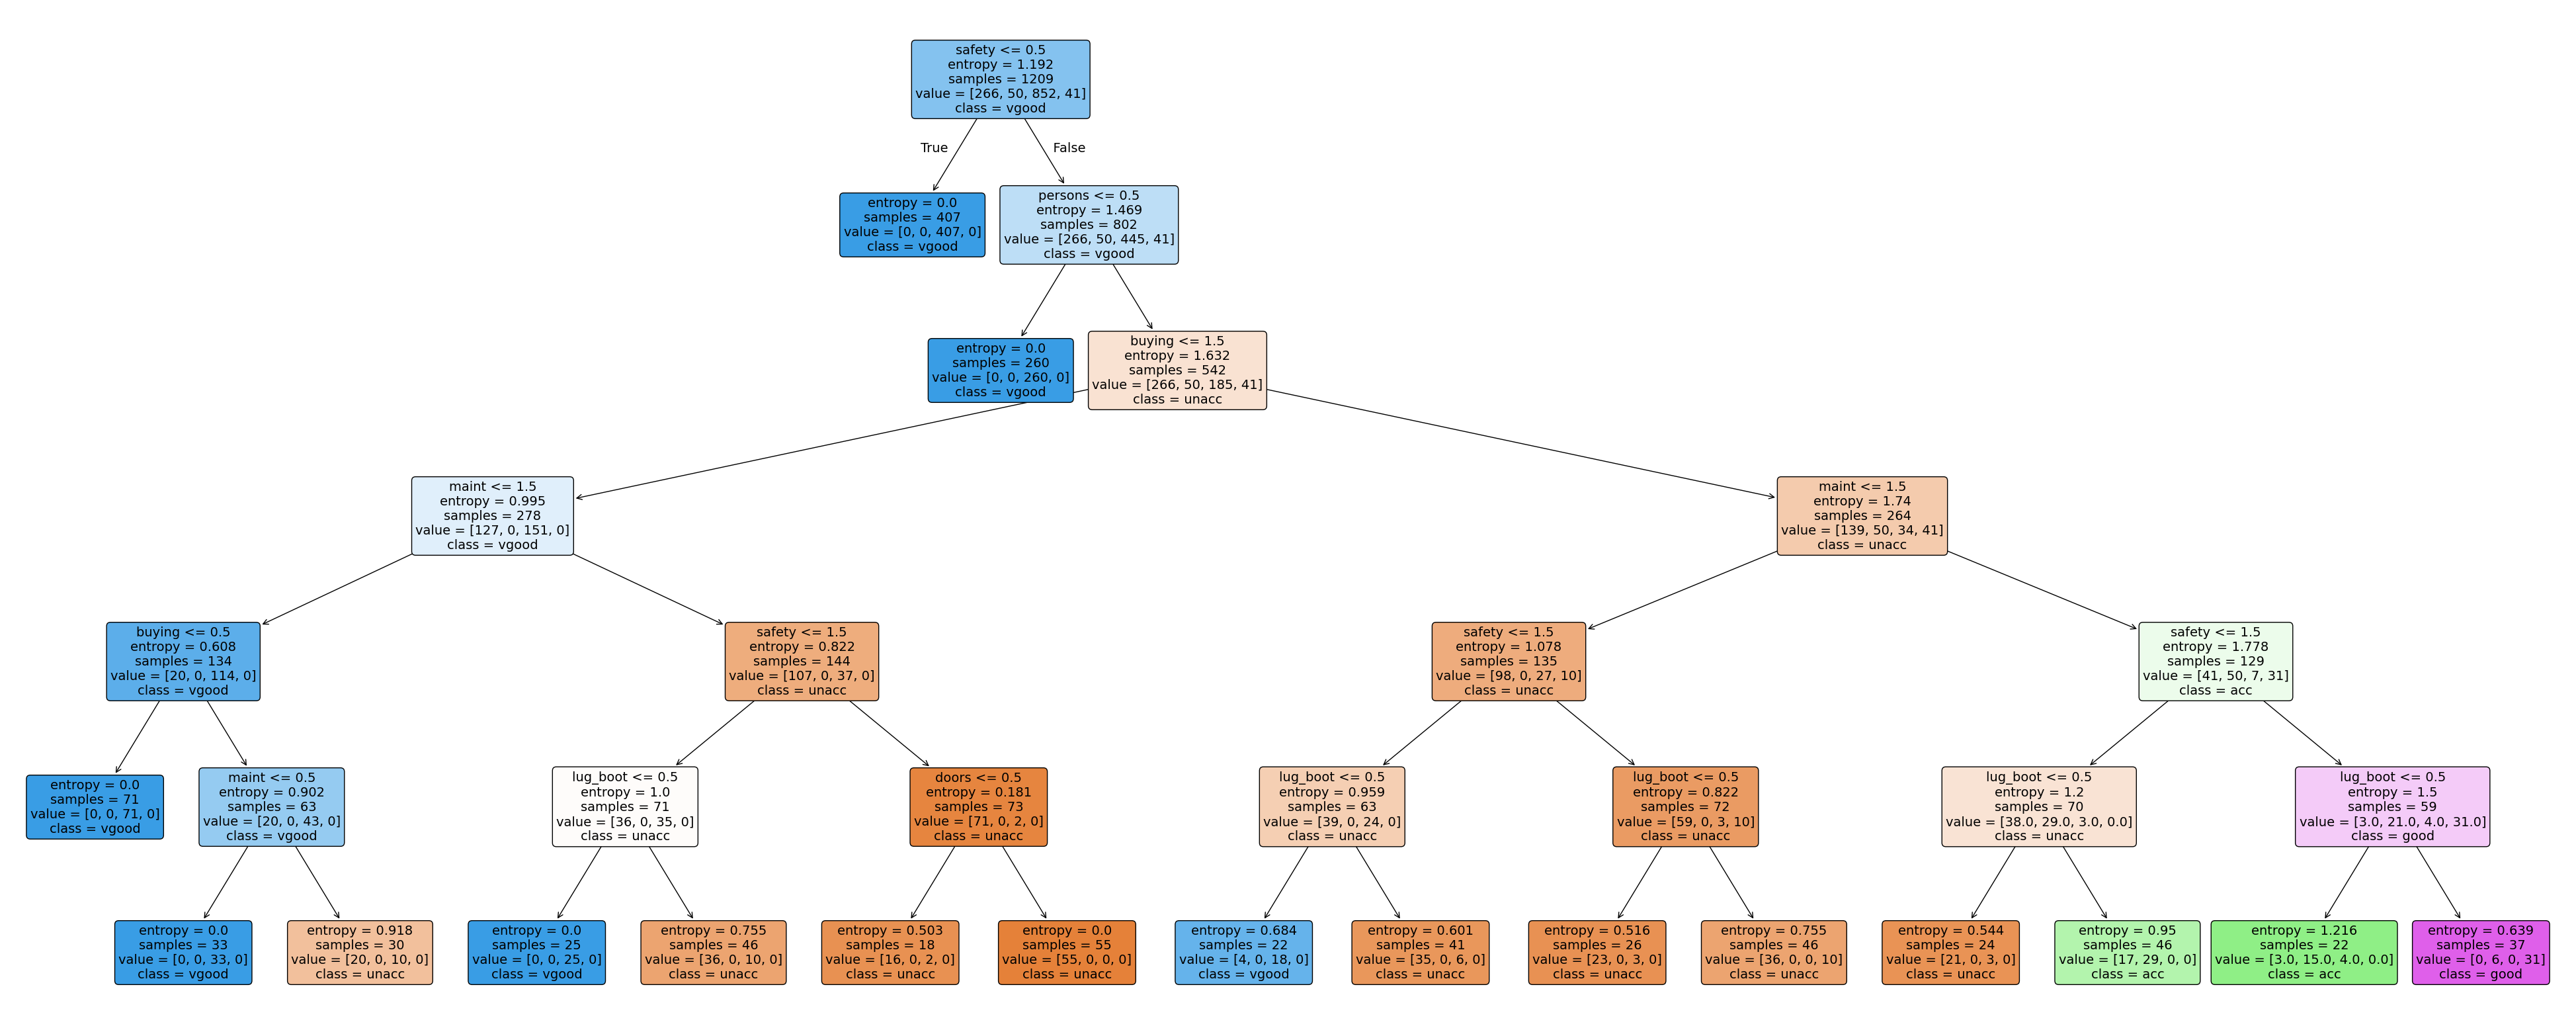

In [ ]:
fig = plt.figure(figsize=(50,20))
a = tree.plot_tree(clf_entropy,
                   feature_names = attributes_names,
                   class_names = y.unique(),
                   rounded = True, filled = True, fontsize=14)

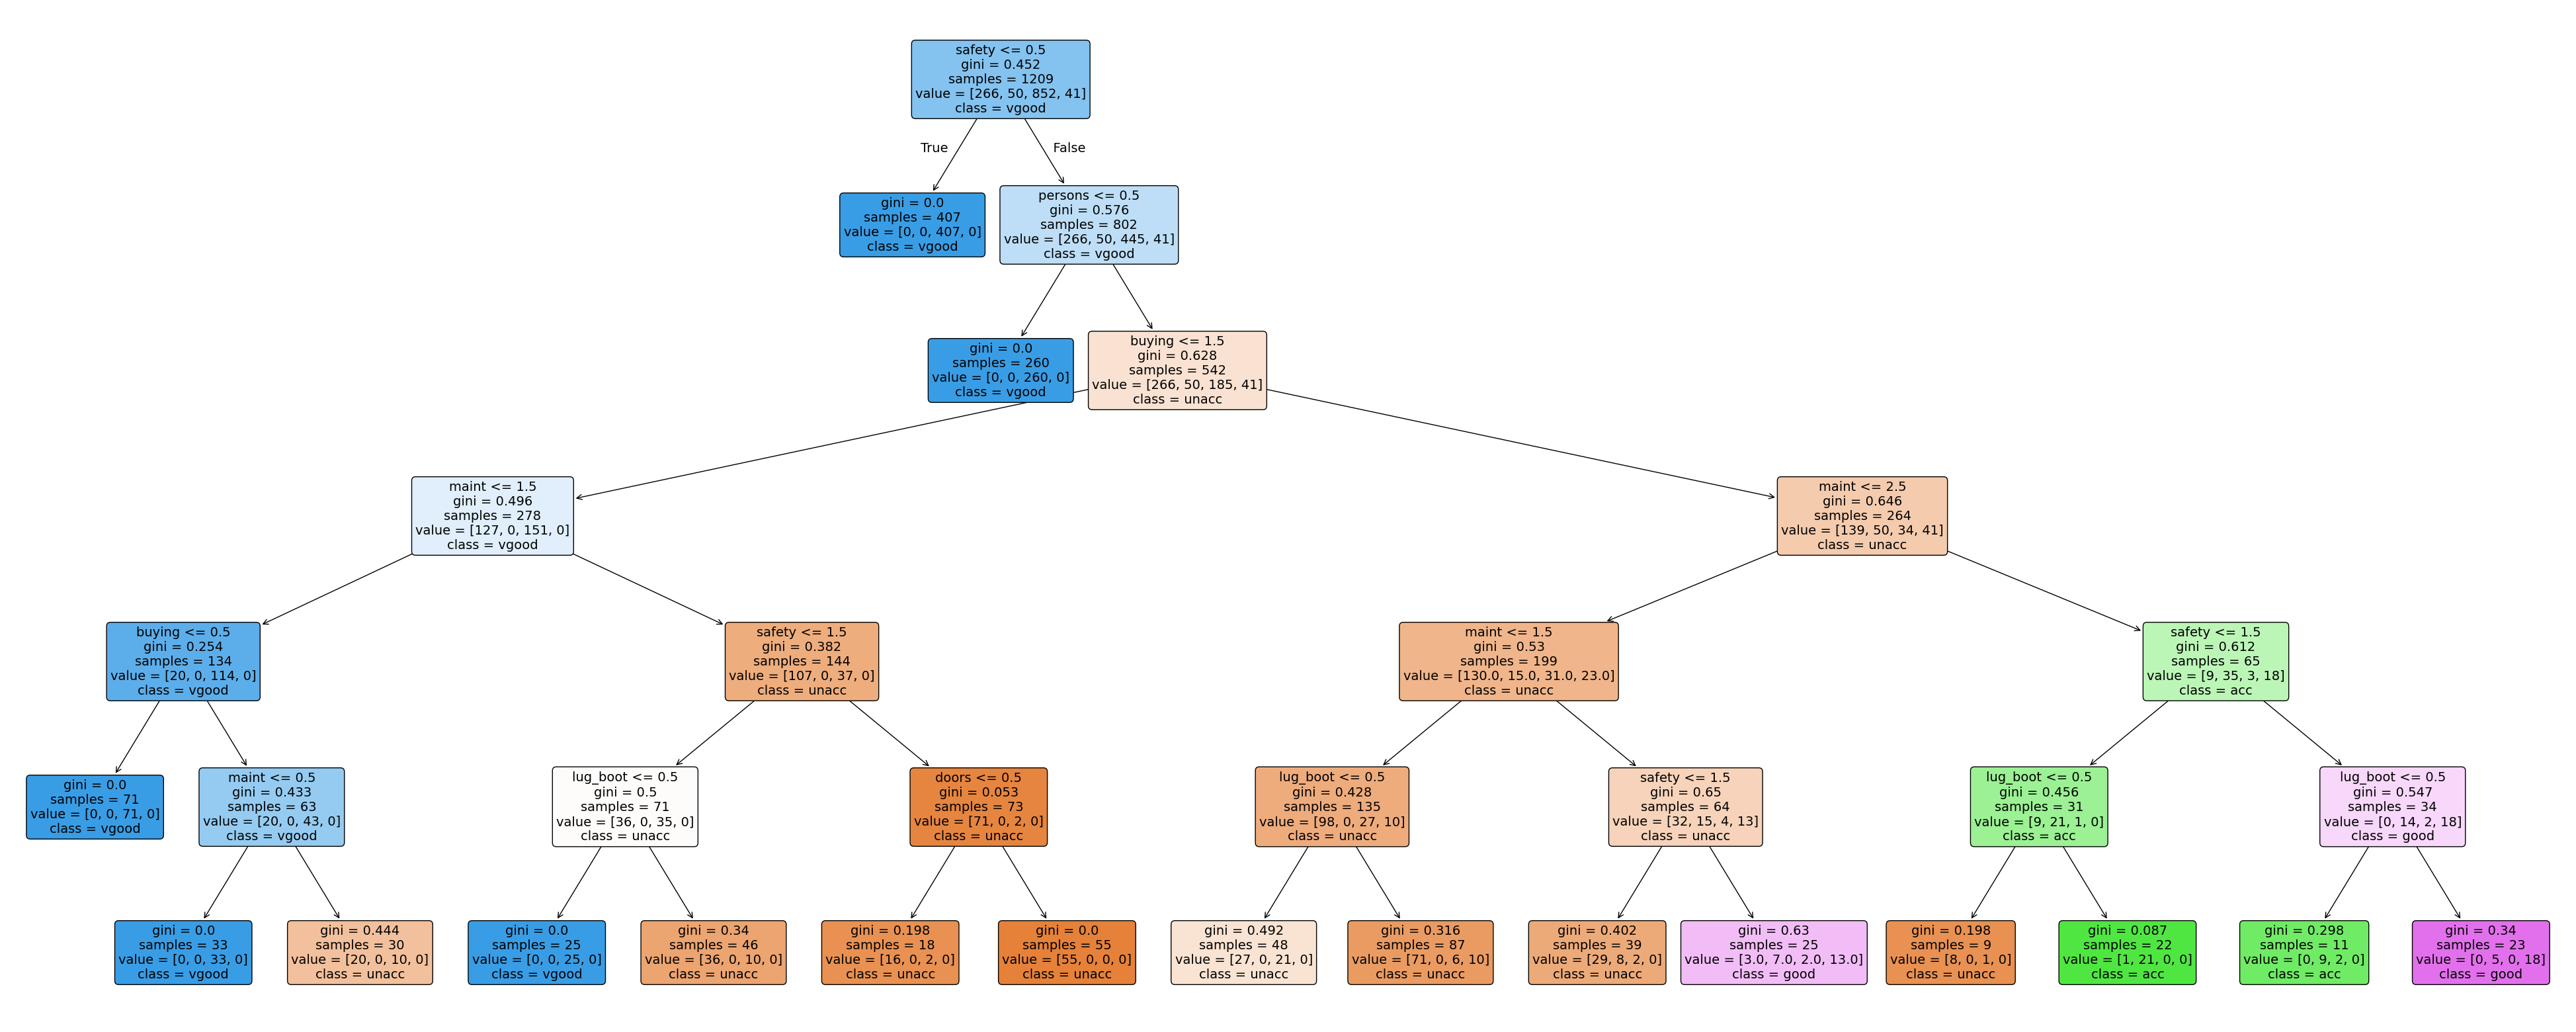

In [ ]:
fig = plt.figure(figsize=(50,20))
a = tree.plot_tree(clf_gini,
                   feature_names = attributes_names,
                   class_names = y.unique(),
                   rounded = True, filled = True, fontsize=14)

In [ ]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
test_pred_decision_tree_entropy = clf_entropy.predict(X_test)
df_pred = pd.DataFrame(test_pred_decision_tree_entropy, columns = ["predictions"])
df_pred['predictions'].unique()

array(['unacc', 'good', 'acc', 'vgood'], dtype=object)

In [ ]:
test_pred_decision_tree_gini = clf_gini.predict(X_test)
df_pred = pd.DataFrame(test_pred_decision_tree_gini, columns = ["predictions"])
df_pred['predictions'].unique()

array(['unacc', 'good', 'acc', 'vgood'], dtype=object)

so entropija kako kriterium za kolku e dobra podelbata, se dobivaat malku podobri rezultati

kaj klasite koi se ponezastapeni ima polosi predviduvanja

In [ ]:
print(classification_report(y_test, test_pred_decision_tree_entropy))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       118
        good       0.57      0.84      0.68        19
       unacc       0.99      0.97      0.98       358
       vgood       0.78      0.88      0.82        24

    accuracy                           0.93       519
   macro avg       0.80      0.88      0.84       519
weighted avg       0.94      0.93      0.94       519



In [ ]:
print(classification_report(y_test, test_pred_decision_tree_gini))

              precision    recall  f1-score   support

         acc       0.80      0.90      0.85       118
        good       0.67      0.53      0.59        19
       unacc       1.00      0.95      0.97       358
       vgood       0.66      0.88      0.75        24

    accuracy                           0.92       519
   macro avg       0.78      0.81      0.79       519
weighted avg       0.93      0.92      0.92       519



# Random Forest

so izbiranje na random samples, bootsrap = True

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, bootstrap = True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

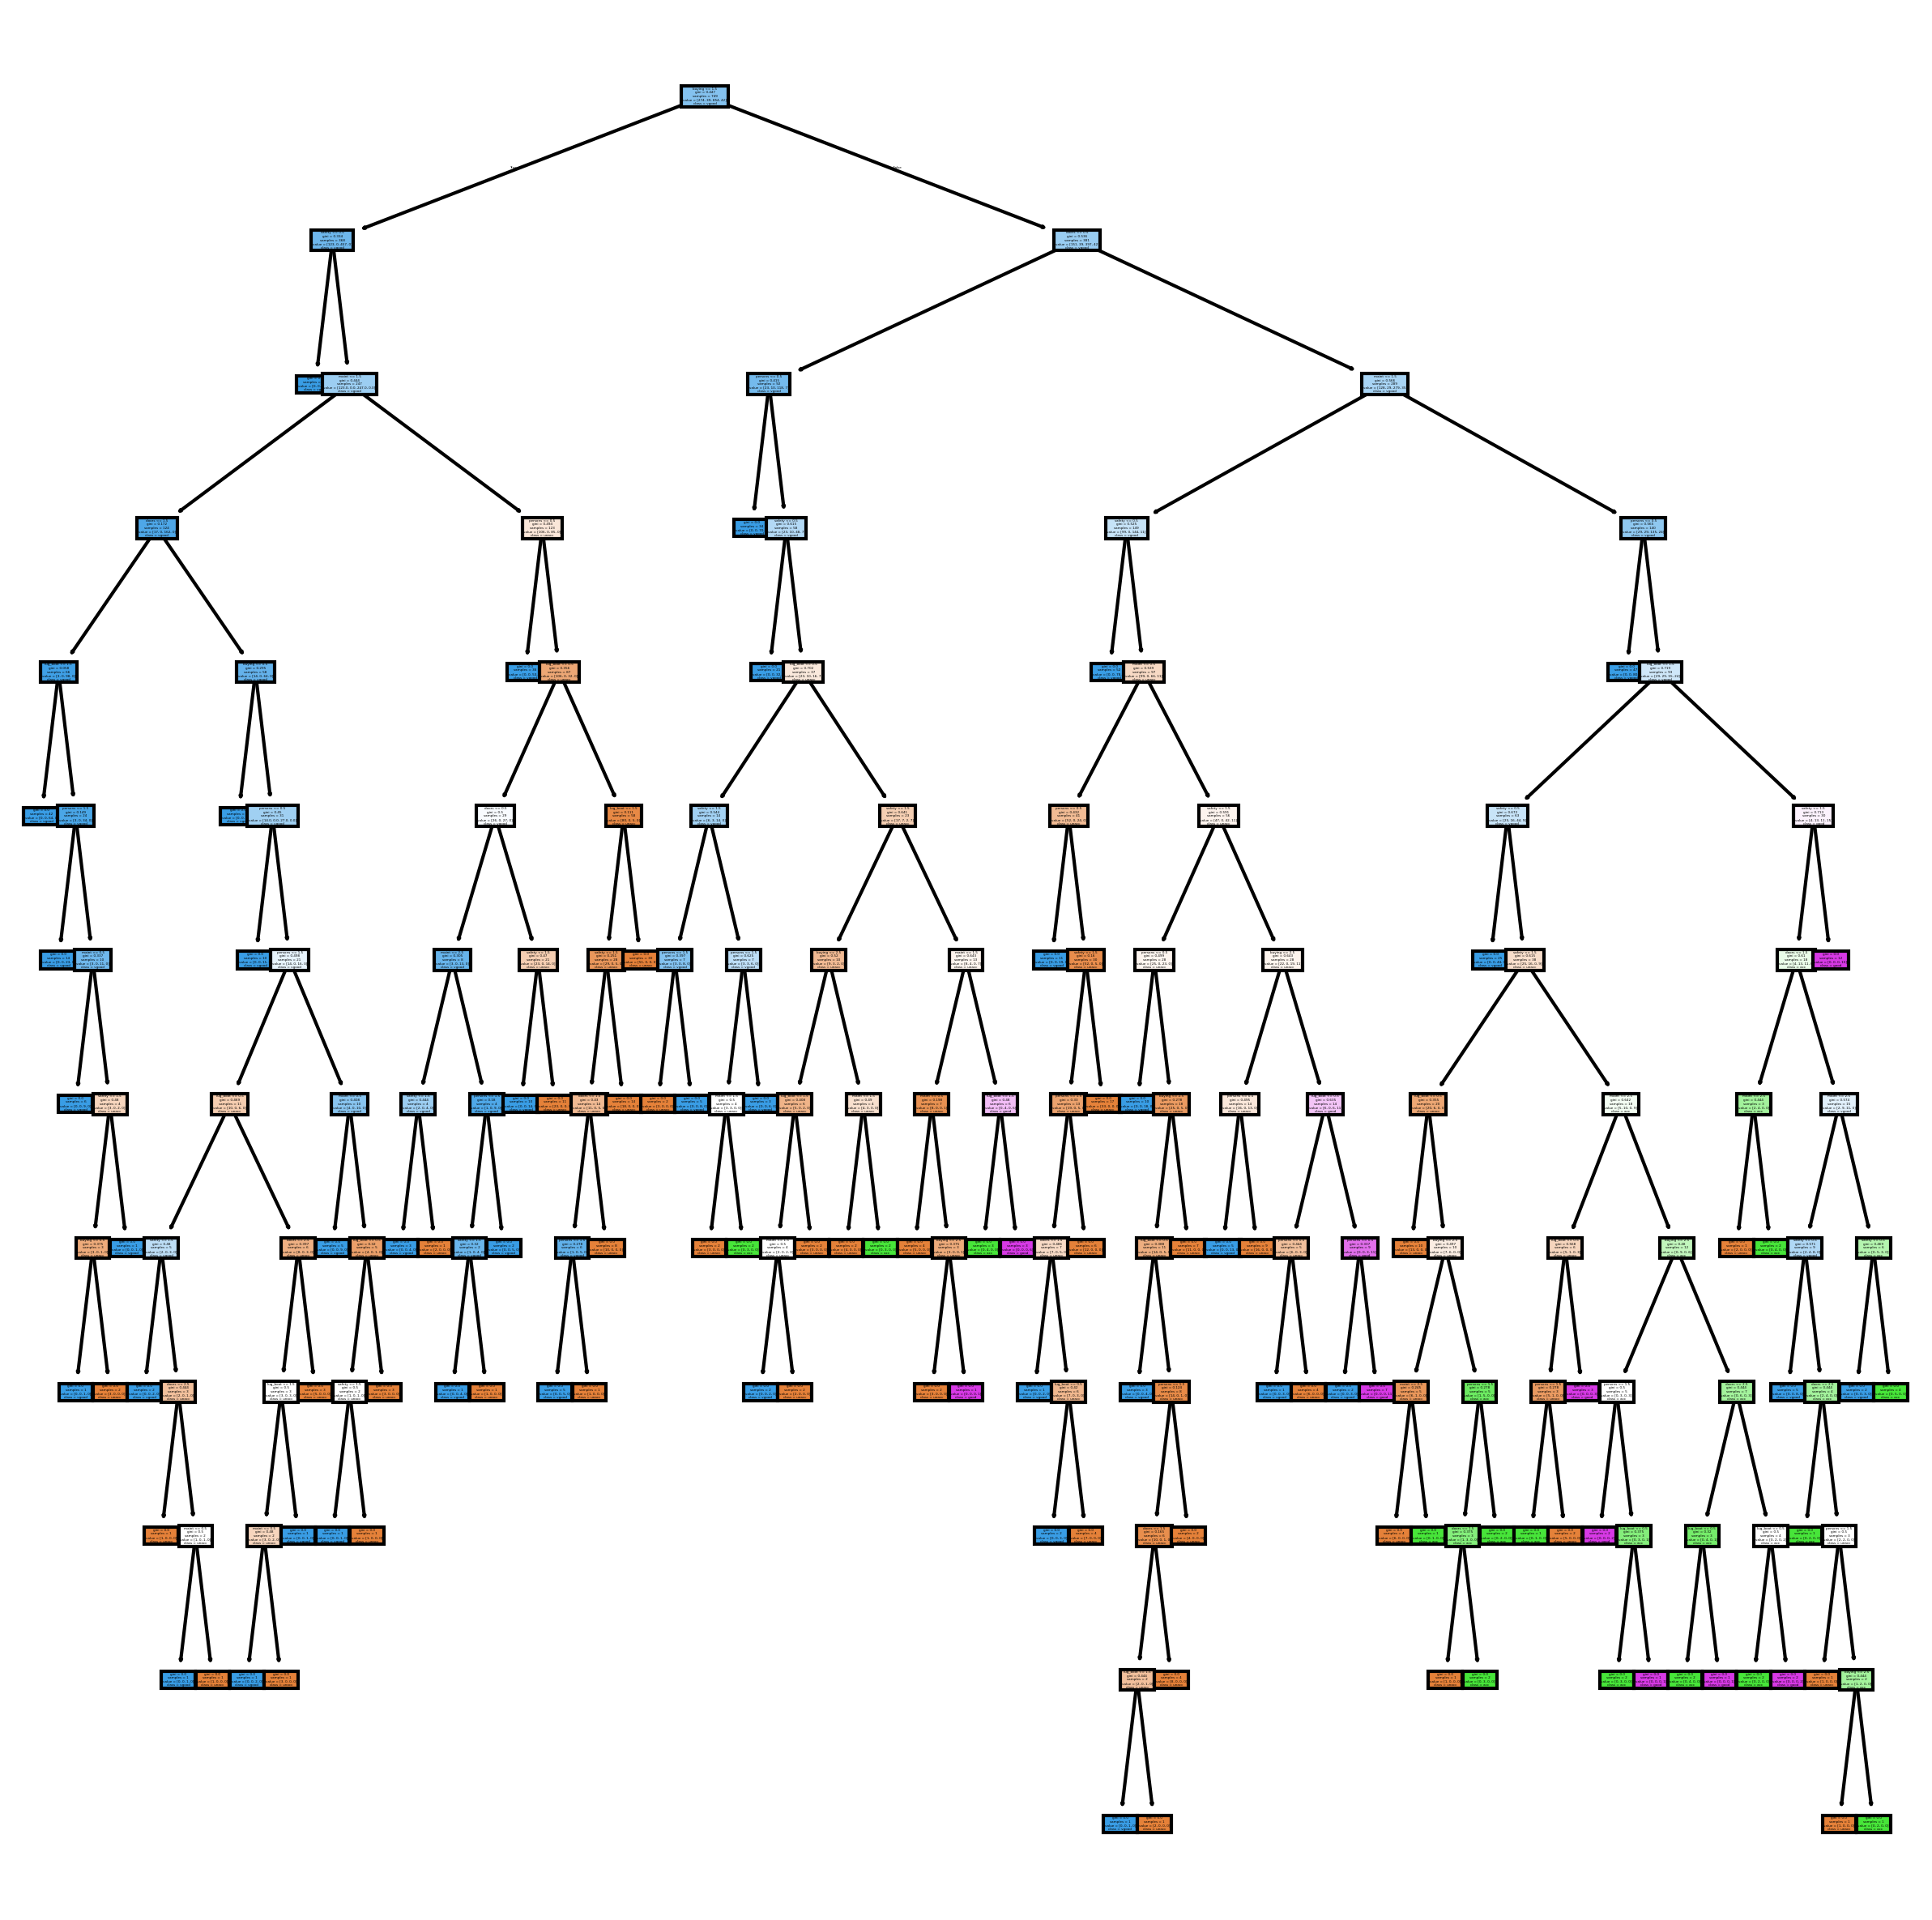

In [ ]:
fn = attributes_names
cn = y.unique()

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (10, 10), dpi=300)

tree.plot_tree(rf.estimators_[0], feature_names = fn, class_names=cn, filled = True);

In [ ]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         acc       0.94      0.88      0.91       118
        good       0.71      0.89      0.79        19
       unacc       0.99      0.99      0.99       358
       vgood       0.88      0.88      0.88        24

    accuracy                           0.96       519
   macro avg       0.88      0.91      0.89       519
weighted avg       0.96      0.96      0.96       519



# Neural Network

2 skrieni sloevi, eden so 40 jazli, drug so 20

so poveke sloevi, a i so poveke jazli vo sloj, davase polosi rezultati

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(40, 20), activation='relu', learning_rate_init=0.01, max_iter=300, random_state=42)
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 20), learning_rate_init=0.01,
              max_iter=300, random_state=42)

In [ ]:
y_pred_nn = nn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

         acc       0.96      0.92      0.94       118
        good       0.71      0.89      0.79        19
       unacc       1.00      0.99      1.00       358
       vgood       0.82      0.96      0.88        24

    accuracy                           0.97       519
   macro avg       0.87      0.94      0.90       519
weighted avg       0.97      0.97      0.97       519

